<a href="https://colab.research.google.com/github/Anuadetayo/Hamoye-Stage-E/blob/main/Hamoye_stage_E_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [6]:
data = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv", parse_dates=['FullDate'],index_col=['FullDate'])
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [7]:
data.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [10]:
data_daily = data.resample('D').sum()
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


Text(0, 0.5, 'G_A_P')

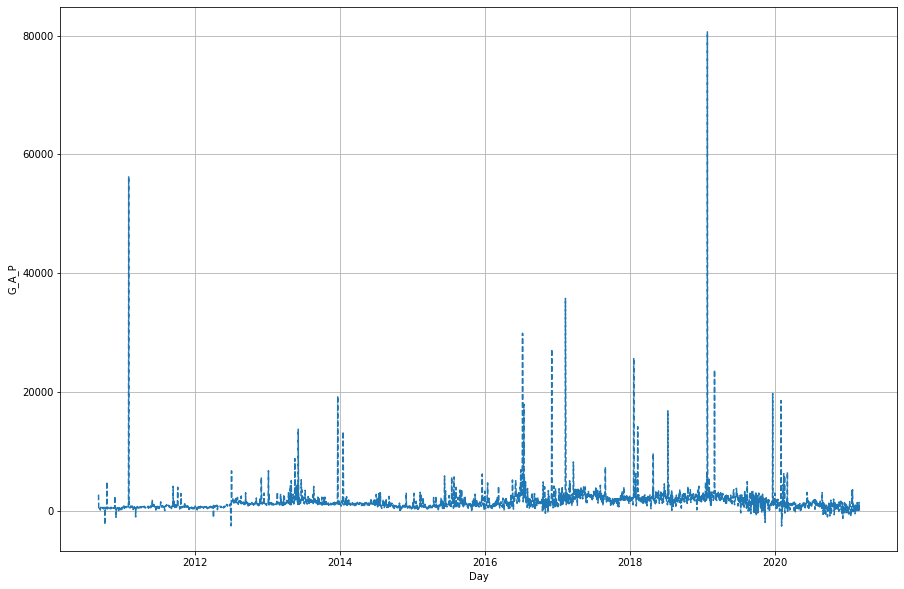

In [12]:
plt.figure(figsize=(15,10))
plt.plot(data_daily.index, data_daily.ElecPrice, '--')
plt.grid()
plt.xlabel('Day')
plt.ylabel('G_A_P')

In [13]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
p_sysload = adfuller(data_daily['SysLoad'])
print(f'p-value: {round(p_sysload[1],6)}')

p-value: 0.004254


In [20]:
p_gasprice = adfuller(data_daily['GasPrice'])
print(f'p-value: {round(p_gasprice[1],6)}')

p-value: 0.045027


In [21]:
c_gasprice = adfuller(data_daily['GasPrice'])
print('Critical Values:')
for k, v in c_gasprice[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [22]:
c_elecprice = adfuller(data_daily['ElecPrice'])
print('Critical Values:')
for k, v in c_elecprice[4].items():
 print(f'{k} : {v}')

Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663
